# Árvores de Decisão - Random Forest - Crédito Bancário

### Disponível em: https://mkmanu.wordpress.com/2014/08/28/modelling-credit-score-in-r-part-1/

Classe:
Credito: 0 - não concedido, 1 - concedido

Atributos:

duraçao_emprestimo: em meses

tempo_de_residencia: em anos

Quantidade_emprestimo: em Reais

Idade: em anos

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("credito.csv")
df = df.drop(df.columns[[0]], axis=1)
df.head()

,Credito,duracao_emprestimo,tempo_de_residencia,Quantidade_Emprestimo,idade
0,0,6,4,1169,67
1,1,48,2,5951,22
2,0,12,3,2096,49
3,0,42,4,7882,45
4,1,24,4,4870,53


In [3]:
print("tamanho do dataset: ",len(df))

tamanho do dataset:  1000


In [4]:
# Resumo estatístico
print(df.describe())

           Credito  duracao_emprestimo  tempo_de_residencia  \
count  1000.000000         1000.000000          1000.000000   
mean      0.300000           20.903000             2.845000   
std       0.458487           12.058814             1.103718   
min       0.000000            4.000000             1.000000   
25%       0.000000           12.000000             2.000000   
50%       0.000000           18.000000             3.000000   
75%       1.000000           24.000000             4.000000   
max       1.000000           72.000000             4.000000   

       Quantidade_Emprestimo        idade  
count            1000.000000  1000.000000  
mean             3271.258000    35.546000  
std              2822.736876    11.375469  
min               250.000000    19.000000  
25%              1365.500000    27.000000  
50%              2319.500000    33.000000  
75%              3972.250000    42.000000  
max             18424.000000    75.000000  


In [5]:
# Correlação
print(df.corr())

                        Credito  duracao_emprestimo  tempo_de_residencia  \
Credito                1.000000            0.214927             0.002967   
duracao_emprestimo     0.214927            1.000000             0.034067   
tempo_de_residencia    0.002967            0.034067             1.000000   
Quantidade_Emprestimo  0.154739            0.624984             0.028926   
idade                 -0.091127           -0.036136             0.266419   

                       Quantidade_Emprestimo     idade  
Credito                             0.154739 -0.091127  
duracao_emprestimo                  0.624984 -0.036136  
tempo_de_residencia                 0.028926  0.266419  
Quantidade_Emprestimo               1.000000  0.032716  
idade                               0.032716  1.000000  


In [6]:
# Gera os dados de treino

X = df.loc[:,["duracao_emprestimo", "tempo_de_residencia", "Quantidade_Emprestimo", "idade"]]
Y = df.loc[:,["Credito"]].values.reshape(-1,1)

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = .3)

In [7]:
print(len(XTrain))
print(len(XTest))

700
300


In [8]:
# Criação do modelo - Arvore de Decisao
clf = DecisionTreeClassifier()

In [9]:
print(clf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [10]:
modelo = clf.fit(XTrain, YTrain)
previsoes = modelo.predict(XTest)

In [11]:
print (confusion_matrix(YTest, previsoes))

[[146  63]
 [ 60  31]]


In [12]:
print (accuracy_score(YTest, previsoes))

0.59


## Utilizando o Random Forest Classifier

In [13]:
clf = RandomForestClassifier(n_estimators  = 1000)

Os 4 principais parâmetros em Modelos de Random Forest são:

n_estimators - quanto maior, melhor!

max depth - o padrão é 'none' e nesse caso árvores completas são criadas. Ajustando esse parâmetro pode ajudar a evitar overfitting.

max_features - diferentes valores devem ser testados, pois este parâmetro impacta na forma como os modelos RF distribuem os atributos pelas árvores.

criterion - define a forma como o algoritmo fará a divisão dos atributos e a classificação dos nós em cada árvore.

In [14]:
# Construção do modelo
modelo = clf.fit(XTrain, YTrain.ravel())

In [15]:
modelo

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
#previsoes = modelo.predict(XTest)
# Create random forest classifier instance
predictions = modelo.predict(XTest)

In [17]:
#modelo.score(XTest, predictions)
accuracy_score(YTest, predictions)

0.64666666666666661

In [18]:
print ("Train Accuracy :: ", accuracy_score(YTrain, modelo.predict(XTrain)))
print ("Test Accuracy  :: ", accuracy_score(YTest, predictions))
print (" Confusion matrix :: \n ", confusion_matrix(YTest, predictions))

Train Accuracy ::  1.0
Test Accuracy  ::  0.646666666667
 Confusion matrix :: 
  [[169  40]
 [ 66  25]]


### previsao de uma instancia

In [19]:
instance = XTrain[0:1]
instance

,duracao_emprestimo,tempo_de_residencia,Quantidade_Emprestimo,idade
56,12,1,6468,52


In [20]:
print(modelo.predict(instance))

[1]


In [21]:
print(modelo.predict_proba(instance))

[[ 0.229  0.771]]


### 23% de Negar crédito e 77% de Aceitar Crédito

## Extraindo a Importância dos Atributos

In [22]:
# Extraindo a importância
atributos = ["duracao_emprestimo", "tempo_de_residencia", "Quantidade_Emprestimo", "idade"]
importances = modelo.feature_importances_
print(atributos)
importances

['duracao_emprestimo', 'tempo_de_residencia', 'Quantidade_Emprestimo', 'idade']


array([ 0.20529293,  0.08375968,  0.4420762 ,  0.26887119])

## plotar os atributos e suas importancias

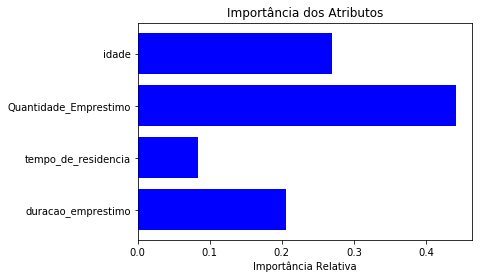

In [23]:
plt.figure(1)
plt.yticks(np.arange(len(atributos)), atributos)
plt.title('Importância dos Atributos')
plt.barh(range(len(atributos)), importances, color = 'b', align = 'center')
#plt.yticks(range(len(indices)),ind)
plt.xlabel('Importância Relativa')
plt.show()

# Métodos Ensemble

## Bagging 1

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# Construção do Classificador
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5)

In [26]:
bagging

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [27]:
### cross_val_score - Evaluate a score by cross-validation

In [28]:
# Score do modelo
scores = cross_val_score(bagging, X, Y.ravel())

In [29]:
# Média do score
mean = scores.mean()
mean

0.70099440758123388

In [30]:
print(scores)

[ 0.70658683  0.6966967   0.6996997 ]


## Bagging 2

In [31]:
# Construção do Classificador
bagging = BaggingClassifier(RandomForestClassifier(n_estimators  = 5000), max_samples = 0.5, max_features = 0.5)

In [32]:
bagging

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [33]:
# Score do modelo
scores = cross_val_score(bagging, X, Y.ravel())

In [34]:
print(scores)

[ 0.7245509   0.68168168  0.68468468]


In [35]:
# Média do score
mean = scores.mean()
mean

0.69697242152331984

## Extremely Randomized Trees (ExtraTrees)

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

In [37]:
# Cria o classificador
clf = DecisionTreeClassifier(max_depth = None, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, X, Y)
mean = scores.mean()
print(scores)
print(mean)

[ 0.60179641  0.61561562  0.61561562]
0.611009212806


In [38]:
clf = RandomForestClassifier(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, X, Y.ravel())
mean = scores.mean()
print(scores)
print(mean)

[ 0.67365269  0.64864865  0.66966967]
0.663990337643


In [39]:
clf = ExtraTreesClassifier(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, X, Y.ravel())
mean = scores.mean()
print(scores)
print(mean)

[ 0.66167665  0.65465465  0.68468468]
0.667005328682


## Adaboost

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
# Construindo o estimador base
estim_base = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1)
estim_base.fit(XTrain, YTrain)
estim_base_err = 1.0 - estim_base.score(XTest, YTest)
estim_base_err

0.30333333333333334

In [42]:
ada_clf = AdaBoostClassifier(base_estimator = estim_base, 
                                  learning_rate = 1.0, 
                                  n_estimators = 400, 
                                  algorithm = "SAMME")

In [43]:
ada_clf.fit(XTrain, YTrain.ravel())

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=400, random_state=None)

In [44]:
scores = cross_val_score(ada_clf, XTest, YTest.ravel())
print(scores)
means = scores.mean()
print(means)

[ 0.63366337  0.7         0.62626263]
0.6533086642


# Gradiente Boosting Classifier

Parâmetros mais importantes:

Número de árvores de regressão (n_estimators)

Profundidade de cara árvore (max_depth)

loss function (loss)

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

# Cria o classificador
est = GradientBoostingClassifier(n_estimators = 600, max_depth = 3)

# Cria o modelo
est.fit(XTrain, YTrain.ravel())

# Previsões das classes (labels)
pred = est.predict(XTest)

# Score nos dados de teste (Acurácia)
acc = est.score(XTest, YTest.ravel())
print('Acurácia: %.4f' % acc)

# Previsão das probabilidades das classes
#est.predict_proba(XTest)[0]

Acurácia: 0.6433


## XGBoost - Algoritmo Ensemble Mais Eficiente

### Regularização (controla a complexidade, Reduz o Overfitting) ###
### Objective Function : Training Loss + Regularization ###
### Usa processamento paralelo (Roda no Spark) ###

In [ ]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
model = XGBClassifier()
model.fit(XTrain, YTrain.ravel())
# make predictions for test data
y_pred = model.predict(XTest)

In [ ]:
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(YTest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

## XGBoost - Exemplo 2

In [ ]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# load data
dataset = pd.read_csv('pima-indians-diabetes.csv')
dataset.columns = [ "preg", "glucose", "Diastolic", "Triceps", "insulin", "BDI", "ped_func", "Age", "Class"]
dataset.head()

In [ ]:
len(dataset)

In [ ]:
# split data into X and y
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]

In [ ]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("XGBoost")
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
# Bagging
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5)

In [ ]:
# Score do modelo
scores = cross_val_score(bagging, X, Y.ravel())

In [ ]:
print("Bagging")
means = scores.mean()
print("Accuracy: %.2f%%" % (means * 100.0))

## fim